In [37]:
import numpy as np
import pandas as pd

In [38]:
# Pandas tried to open the file using the UTF-8 encoding (its default).
# But your file wasn’t actually saved in UTF-8 — it was saved in another encoding (probably ISO-8859-1 or Windows-1252).
import pandas as pd
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [39]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3123,ham,My uncles in Atlanta. Wish you guys a great se...,NaN,NaN,NaN
4460,ham,Thanks again for your reply today. When is ur ...,NaN,NaN,NaN
4283,ham,Yes. I come to nyc for audiitions and am tryin...,NaN,NaN,NaN
1223,ham,Rofl betta invest in some anti aging products,NaN,NaN,NaN
1019,ham,Don know..wait i will check it.,NaN,NaN,NaN


In [40]:
df.shape

(5572, 5)

In [41]:
# 1. data cleaning
# 2. EDA
# 3. text preprocessing
# 4. model building
# 5. evaluation
# 6.imporvement
# 7. website
# 8. deploy

# Data Cleaning

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [43]:
# drop last 3 column
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [44]:
df.sample(5)

,v1,v2
95,spam,Your free ringtone is waiting to be collected....
2842,ham,"Tunji, how's the queen? how are you doing. Thi..."
1923,ham,Hello. They are going to the village pub at 8 ...
4858,ham,"Hey, a guy I know is breathing down my neck to..."
4379,ham,Done it but internet connection v slow and can...


In [45]:
# renaming the columns
df.rename(columns={'v1': 'target','v2':'text'},inplace=True)

In [46]:
df.sample(5)

,target,text
3317,ham,I'm freezing and craving ice. Fml
2318,ham,On the way to office da..
286,ham,Ok..
1067,ham,Meeting u is my work. . . Tel me when shall i ...
5421,ham,"Hi elaine, is today's meeting confirmed?"


In [47]:
# covert target colum to 0 and 1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [48]:
df['target']=encoder.fit_transform(df['target'])

In [50]:
df.sample(5)

,target,text
5058,1,Free video camera phones with Half Price line ...
1313,0,How abt making some of the pics bigger?
2144,1,FreeMsg: Hey - I'm Buffy. 25 and love to satis...
434,0,You available now? I'm like right around hills...
858,0,Spoons it is then okay?


In [51]:
# missing value checking
df.isnull().sum()

target    0
text      0
dtype: int64

In [52]:
# check for duplicate values
df.duplicated().sum()

403

In [54]:
# remove duplicate
df=df.drop_duplicates(keep='first')

In [55]:
df.duplicated().sum()

0

In [58]:
df.shape

(5169, 2)

# EDA

In [60]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

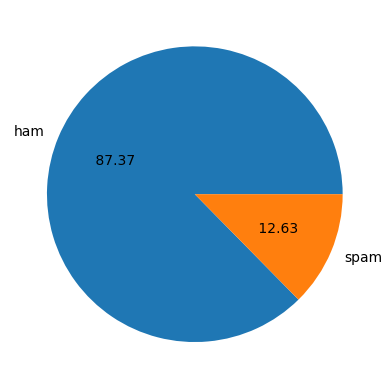

In [62]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct=" %0.2f")

plt.show()

In [63]:
# so from above data is imbalance

In [ ]:
# number of charecters

In [65]:
import nltk

In [66]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Tapash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
df['num_charecter']=df['text'].apply(len)

C:\Users\Tapash\AppData\Local\Temp\ipykernel_16348\3095814749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_charecter']=df['text'].apply(len)


In [72]:
df.sample(5)

,target,text,num_charecter
4339,0,I want to sent &lt;#&gt; mesages today. Thats...,66
506,0,"Maybe westshore or hyde park village, the plac...",62
2818,0,Don't forget who owns you and who's private pr...,111
2887,0,I take it we didn't have the phone callon Frid...,95
3219,0,Its like that hotel dusk game i think. You sol...,72


In [73]:
# numbers of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [76]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Tapash\AppData\Local\Temp\ipykernel_16348\1118471538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [77]:
df.sample(5)

,target,text,num_charecter,num_words
143,0,I know you are. Can you pls open the back?,42,12
2140,0,After the drug she will be able to eat.,39,10
1659,0,"Yeah, where's your class at?",28,8
387,0,Mm that time you dont like fun,30,7
444,0,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,66,10


In [90]:
# number of sentences
df['num_senctences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


C:\Users\Tapash\AppData\Local\Temp\ipykernel_16348\325126020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_senctences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [91]:
df.head()

,target,text,num_charecter,num_words,num_senctences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [92]:
df[['num_charecter','num_words','num_senctences']].describe()

,num_charecter,num_words,num_senctences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [97]:
# ham
df[df['target']==0][['num_charecter','num_words','num_senctences']].describe()

,num_charecter,num_words,num_senctences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [98]:
# spam
df[df['target']==1][['num_charecter','num_words','num_senctences']].describe()

,num_charecter,num_words,num_senctences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [99]:
# we can show it by visulization
import seaborn as sns

<Axes: xlabel='num_charecter', ylabel='Count'>

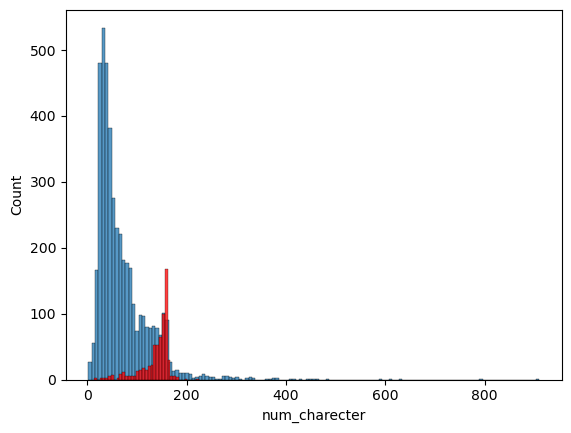

In [106]:
sns.histplot(df[df['target']==0]['num_charecter'])
sns.histplot(df[df['target']==1]['num_charecter'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

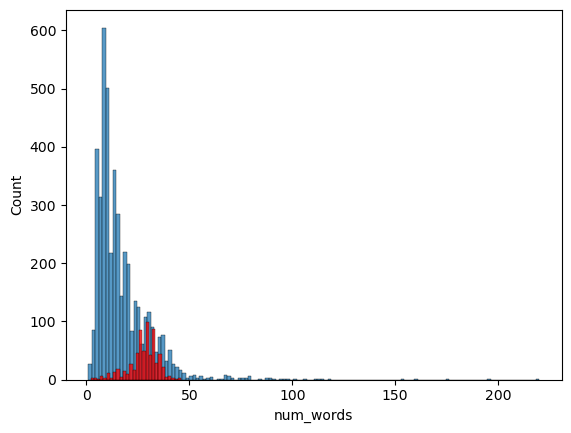

In [107]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_senctences', ylabel='Count'>

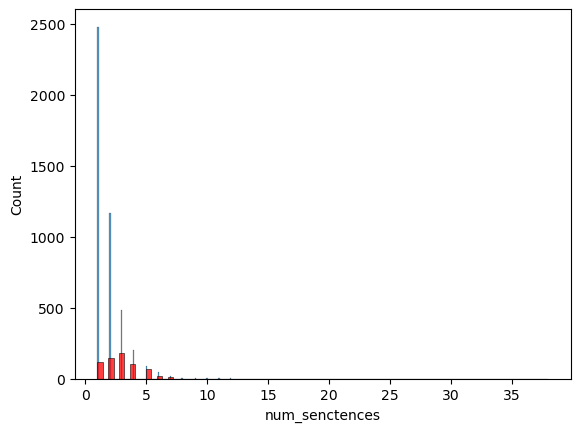

In [108]:
sns.histplot(df[df['target']==0]['num_senctences'])
sns.histplot(df[df['target']==1]['num_senctences'],color='red')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


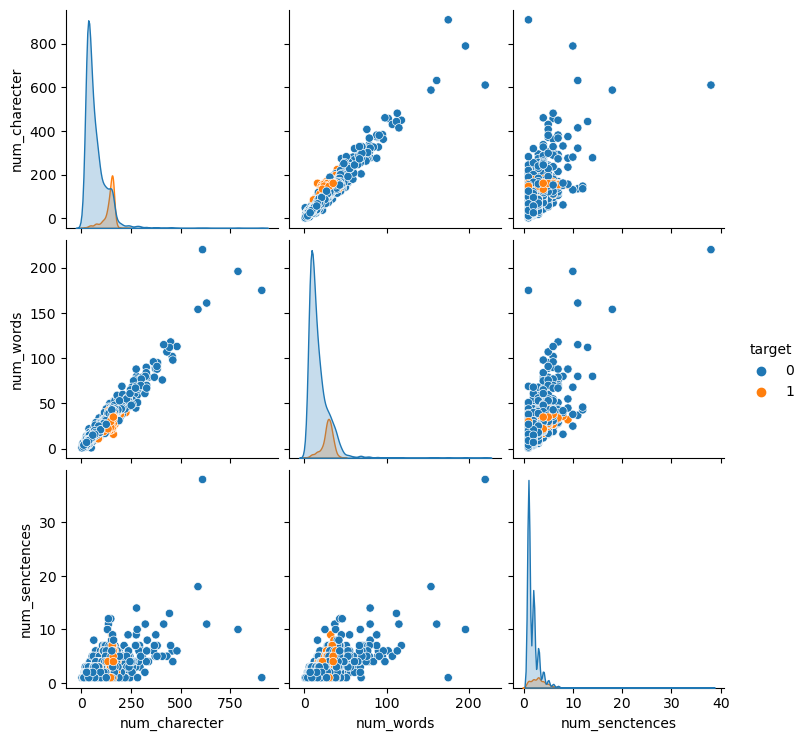

In [109]:
# reletion between them
sns.pairplot(df,hue='target')

In [110]:
# 0-> ham
# 1 -> spam

<Axes: >

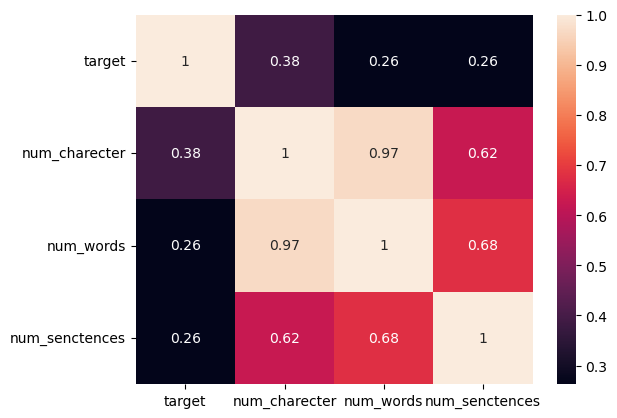

In [117]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Text Preprocessing

- lower case
- tokenization
- remove special charecter
- remove stop word and punctuation
- stemming

In [132]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [133]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [143]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [148]:
def transform_text(text):
    # lower case
    text=text.lower()
    
    # tokenization
    text=nltk.word_tokenize(text)
    
    # removing special charecter
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
            
    # removing special charecter and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    # stemming
    for i in text:
        y.append(ps.stem(i))

        
            
    
    return " ".join(y)

In [152]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\Tapash\AppData\Local\Temp\ipykernel_16348\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [153]:
df.head()

,target,text,num_charecter,num_words,num_senctences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [166]:
# wordcloud

from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [167]:
spam_wc=wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


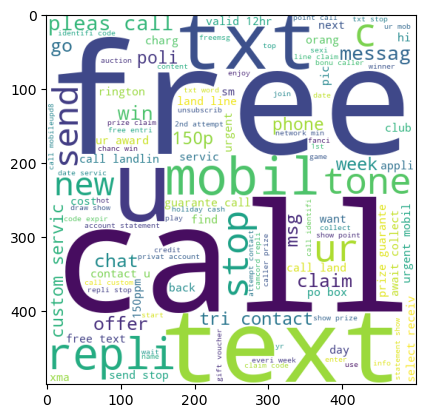

In [168]:
plt.imshow(spam_wc)

In [169]:
spam_wc=wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


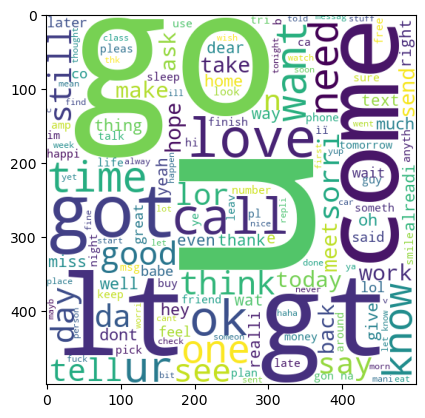

In [171]:
plt.imshow(spam_wc)

In [172]:
# top 30 word used 
df.head()

,target,text,num_charecter,num_words,num_senctences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [199]:
# for spam
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [200]:
len(spam_corpus)

9939

In [201]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [202]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

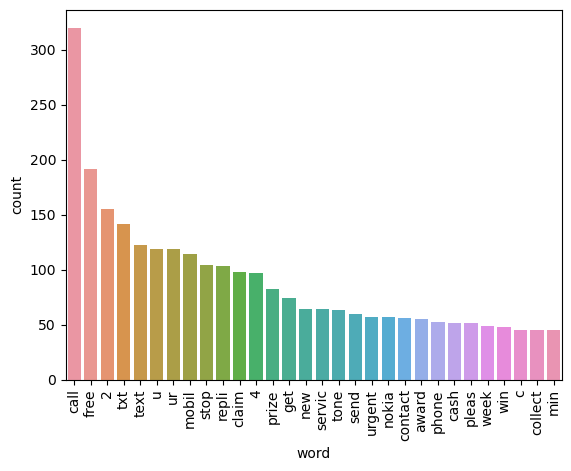

In [203]:
# Create a DataFrame of the top 30 most common words
top30 = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Rename columns for clarity
top30.columns = ['word', 'count']

# Plot
sns.barplot(x='word', y='count', data=top30)
plt.xticks(rotation='vertical')

In [207]:
# for ham
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [208]:
len(ham_corpus)

35404

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

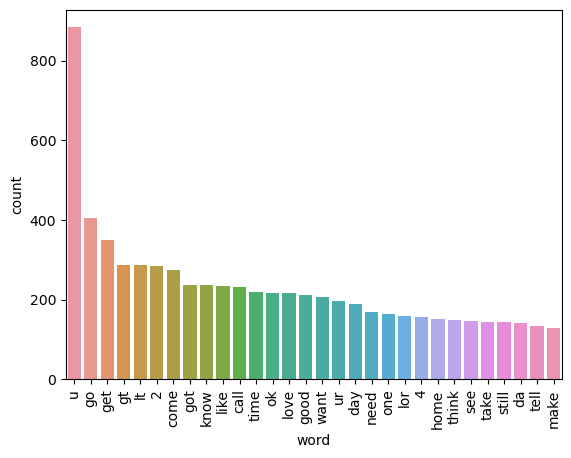

In [209]:
# Create a DataFrame of the top 30 most common words
top30 = pd.DataFrame(Counter(ham_corpus).most_common(30))

# Rename columns for clarity
top30.columns = ['word', 'count']

# Plot
sns.barplot(x='word', y='count', data=top30)
plt.xticks(rotation='vertical')

# Model Building

In [362]:
df.head()

,target,text,num_charecter,num_words,num_senctences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [378]:
# vectorize the input column(transofrmed_text)->BOW or tf idf or word2vec

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf = TfidfVectorizer(max_features=3000)


In [379]:
# X=cv.fit_transform(df['transformed_text']).toarray()
X=tf.fit_transform(df['transformed_text']).toarray()

In [380]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [381]:
X.shape

(5169, 3000)

In [382]:
y=df['target'].values

In [383]:
# train test split
from sklearn.model_selection import train_test_split


In [384]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [385]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [386]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [387]:
X_train.shape

(4135, 3000)

In [388]:
y_train.shape

(4135,)

In [374]:
X_test.shape

(1034, 3000)

In [375]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [389]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)) # this will be taken as its precision is 1 

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [377]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


#### check other algorithm to see their accuracy and precion

In [302]:
from sklearn. linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier

In [320]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb= MultinomialNB()
dtc=DecisionTreeClassifier (max_depth=5)
lrc= LogisticRegression(solver='liblinear', penalty='l1')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc= AdaBoostClassifier(n_estimators=50, random_state=2)
bc= BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [321]:
clfs={
    'SVC': svc,
    'KN': knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'Adaboost':abc,
    'bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [322]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


In [323]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [324]:
accuracies = []
precisions = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f'For {name}')
    print(f'Accuracy: {current_accuracy}')
    print(f'Precision: {current_precision}')
    accuracies.append(current_accuracy)
    precisions.append(current_precision)
    

For SVC
Accuracy: 0.9758220502901354
Precision: 0.9747899159663865
For KN
Accuracy: 0.9052224371373307
Precision: 1.0
For NB
Accuracy: 0.9709864603481625
Precision: 1.0
For DT
Accuracy: 0.9323017408123792
Precision: 0.8333333333333334
For LR
Accuracy: 0.9584139264990329
Precision: 0.9702970297029703
For RF
Accuracy: 0.9758220502901354
Precision: 0.9829059829059829
For Adaboost
Accuracy: 0.9245647969052224
Precision: 0.8488372093023255
For bgc
Accuracy: 0.9584139264990329
Precision: 0.8682170542635659
For ETC
Accuracy: 0.9748549323017408
Precision: 0.9745762711864406
For GBDT
Accuracy: 0.9468085106382979
Precision: 0.9191919191919192
For xgb
Accuracy: 0.9671179883945842
Precision: 0.9482758620689655


In [278]:
# we choose tfidf --> mnb

# Model Improvement

In [279]:
# i changed the max_fetures parameter of tfidf
# tf = TfidfVectorizer()->tf = TfidfVectorizer(max_features=3000)

In [393]:
pip install pickle

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [397]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))